# BLACK FRIDAY SALES ANALYSIS

## Data Overview


This dataset comprises of sales transactions captured at a retail store.The dataset has 550,069 rows and 12 columns.


User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
Gender: indicates the gender of the person making the transaction.
Age: indicates the age group of the person making the transaction.
Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
Marital_Status: is 0 if the user is not married and 1 otherwise.
Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
Purchase: Purchase amount.

In [1]:
import numpy as np 
import pandas as pd 
from tkinter import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.shape

(550068, 12)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#to find out what is the percentile values
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
#user id is just a unique id which is no use here for analysis
df.drop(['User_ID'],axis=1,inplace=True)

In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
550063,0,1
550064,1,0
550065,1,0
550066,1,0


In [10]:
#Handling categorical feature age
df['Age'].unique
#will return unique values in age

<bound method Series.unique of 0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: object>

In [11]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,7,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [14]:
#drop city category
df.drop('City_Category',axis=1,inplace=True)

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,1,10,2,0,3,NaN,NaN,8370
1,P00248942,F,1,10,2,0,1,6.0,14.0,15200
2,P00087842,F,1,10,2,0,12,NaN,NaN,1422
3,P00085442,F,1,10,2,0,12,14.0,NaN,1057
4,P00285442,M,7,16,4+,0,8,NaN,NaN,7969


In [16]:
#to check the missing values/null values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [17]:
#now we have to replace missing values
df['Product_Category_1'].unique()
##there is a nan value in a discrete feature

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [18]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [19]:
df['Product_Category_2'].mode()[0]

8.0

In [20]:
#replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [21]:
###df['Product_Category_2'].isnull().sum

In [22]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [23]:
#Product category 3 replace missing values
df['Product_Category_3'].unique()


array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [24]:
df['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [25]:
#replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [26]:
df.shape

(550068, 10)

In [27]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
#replacing +4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9080\1120201007.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,1,10,2,0,3,8.0,16.0,8370
1,P00248942,F,1,10,2,0,1,6.0,14.0,15200
2,P00087842,F,1,10,2,0,12,8.0,16.0,1422
3,P00085442,F,1,10,2,0,12,14.0,16.0,1057
4,P00285442,M,7,16,4,0,8,8.0,16.0,7969


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 42.0+ MB


In [31]:
#convert object ie stay in current city into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 39.9+ MB


### Q.      what gender shops more on black friday?

<Axes: xlabel='Gender', ylabel='count'>

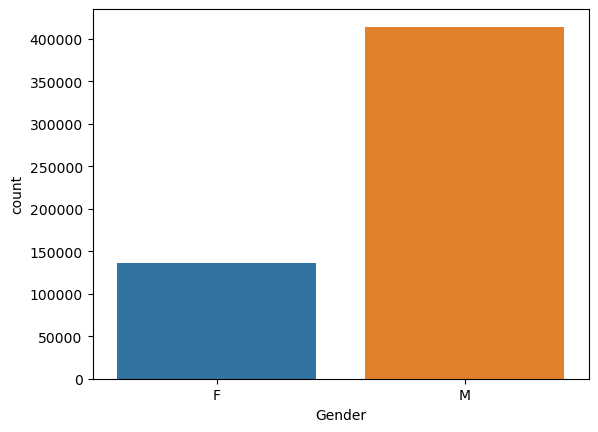

In [32]:
sns.countplot(x='Gender',data=df)

###### Many buyers are male while the minority are female.


### Q.   which age group is the highest spender?

<Axes: xlabel='Age', ylabel='count'>

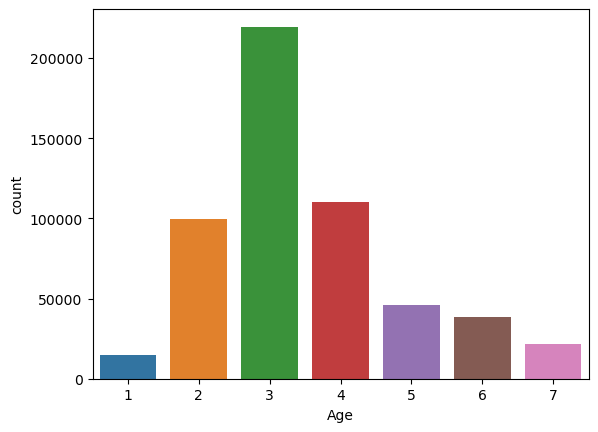

In [33]:
sns.countplot(x='Age',data=df)

######  the age group 3 i.e. 26-35 years people are majority buyers
 

In [34]:
df['Marital_Status']=df['Marital_Status'].map({0:'Single',1:'Married'})
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,1,10,2,Single,3,8.0,16.0,8370
1,P00248942,F,1,10,2,Single,1,6.0,14.0,15200
2,P00087842,F,1,10,2,Single,12,8.0,16.0,1422
3,P00085442,F,1,10,2,Single,12,14.0,16.0,1057
4,P00285442,M,7,16,4,Single,8,8.0,16.0,7969


### Q.   what is the marital status of the customers?

<Axes: xlabel='Marital_Status', ylabel='count'>

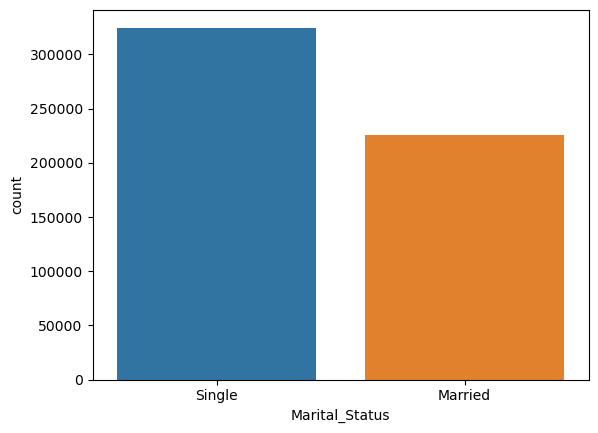

In [35]:
sns.countplot(x='Marital_Status',data=df)

###### Majority of the buyers are single

### Q.   which occupation has lowest count among buyers?

<Axes: xlabel='Occupation', ylabel='count'>

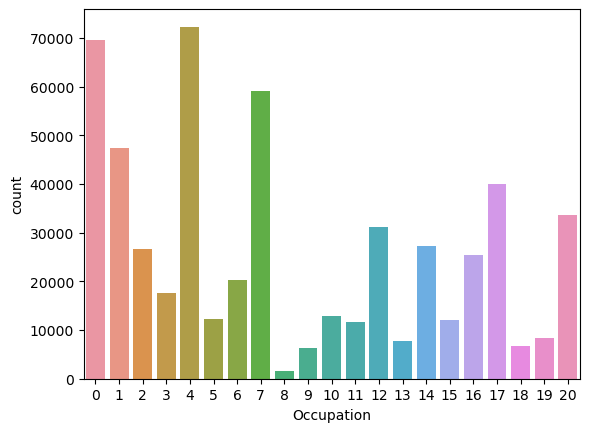

In [36]:
sns.countplot(x='Occupation',data=df)

###### Occupation 8 has extremely low count compared to others

### Q.   Show purchase of products from Product_Category_1?

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

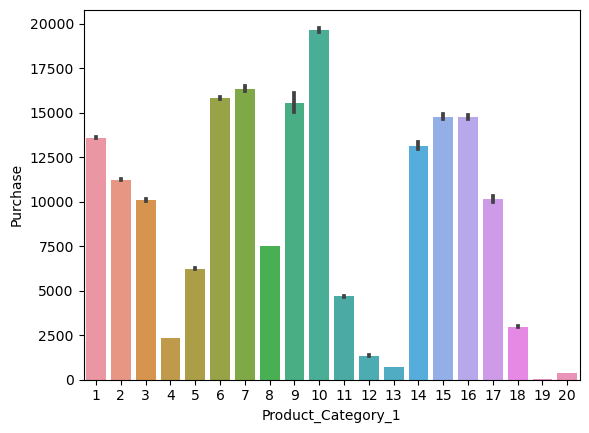

In [37]:
sns.barplot(x='Product_Category_1',y='Purchase',data=df)

###### Majority of the products bought are category1, 5 and 8.

### Q.   Show purchase of products from Product_Category_2

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

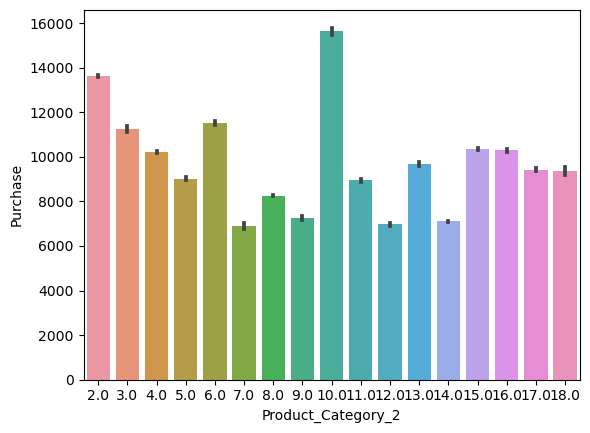

In [38]:
sns.barplot(x='Product_Category_2',y='Purchase',data=df)

###### category 7 is lowest as compared to others

### Q.   Which  products have the least purchase from Product_Category_3?

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

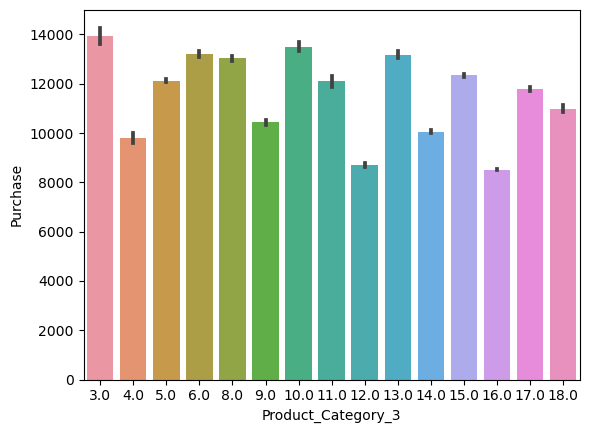

In [39]:
sns.barplot(x='Product_Category_3',y='Purchase',data=df)

###### category 4.0,12.0 and 16.0 have less purchase as compared to others

### Q.   how many buyers stay in the city for 1yr?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

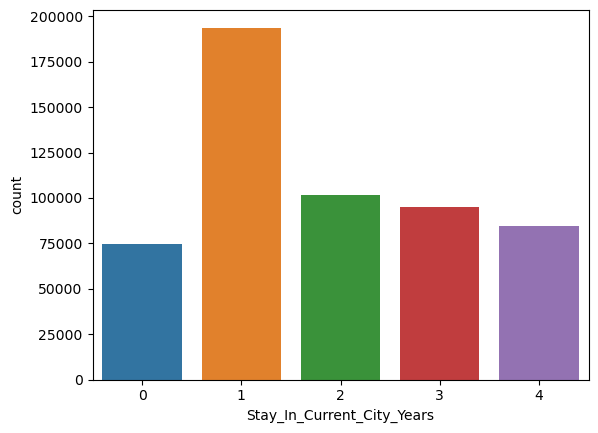

In [40]:
sns.countplot(x='Stay_In_Current_City_Years',data=df)

###### More than 1,75,000 buyers have one year of stay in the current city

### Q.   Show the Occupation and Purchase Analysis graph?

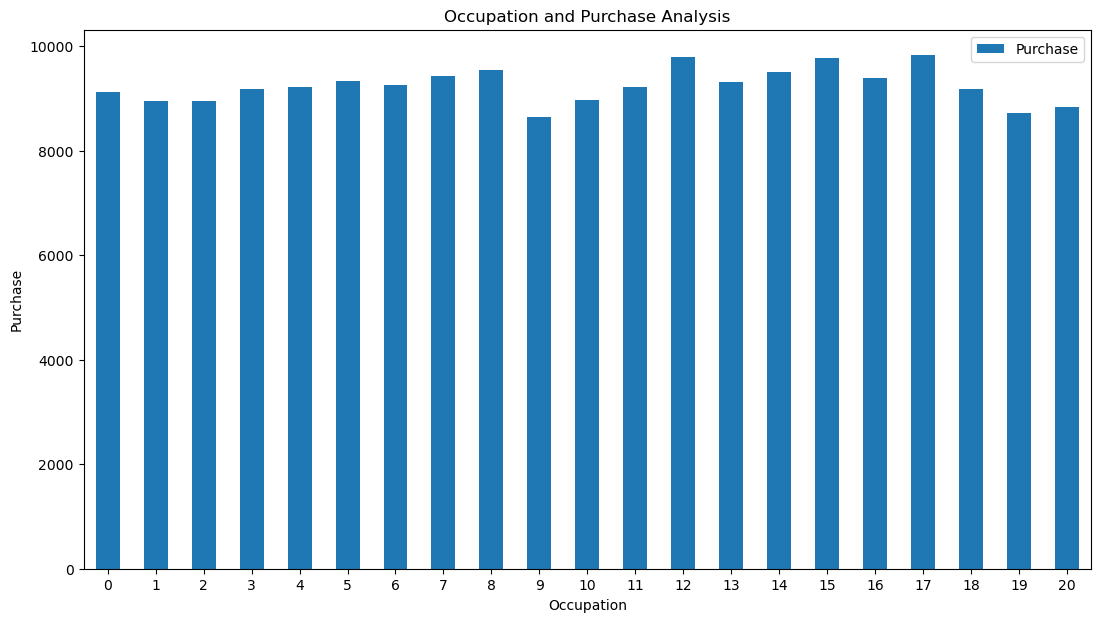

In [41]:
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Q Show the age and purchase analysis graph?

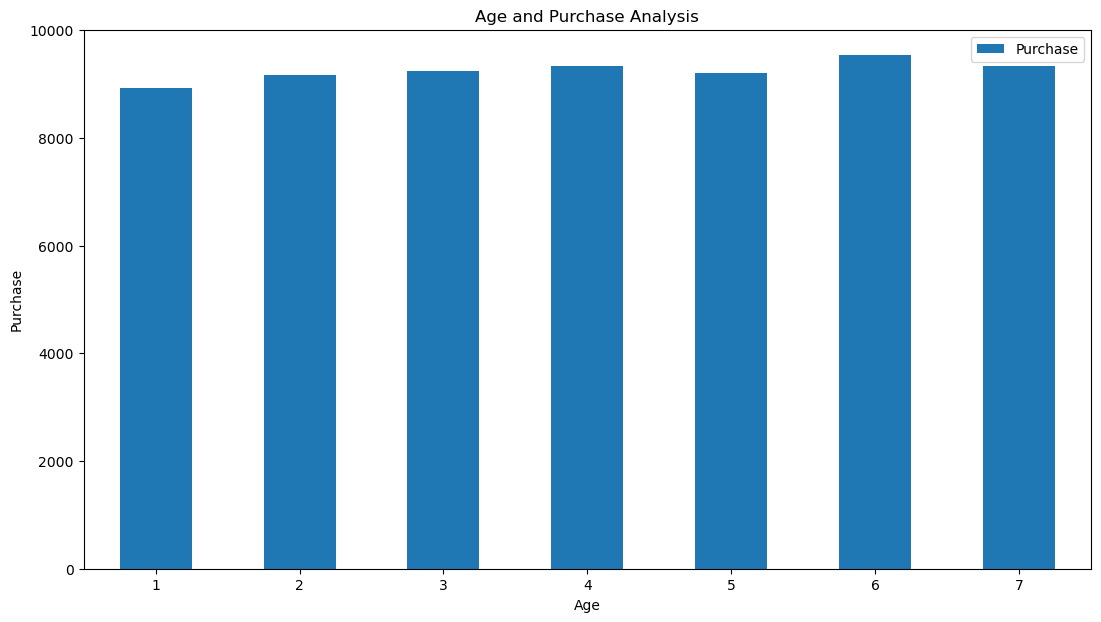

In [42]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Q.   Show the occupation versus age graph.

<Axes: xlabel='Occupation', ylabel='Age'>

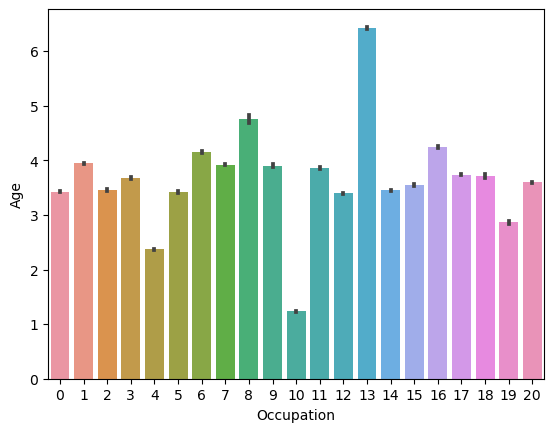

In [43]:
# visualization
sns.barplot(x='Occupation',y='Age',data=df)

### Q. Show Occupation and Purchase Analysis graph according to gender?

<Axes: xlabel='Occupation', ylabel='Purchase'>

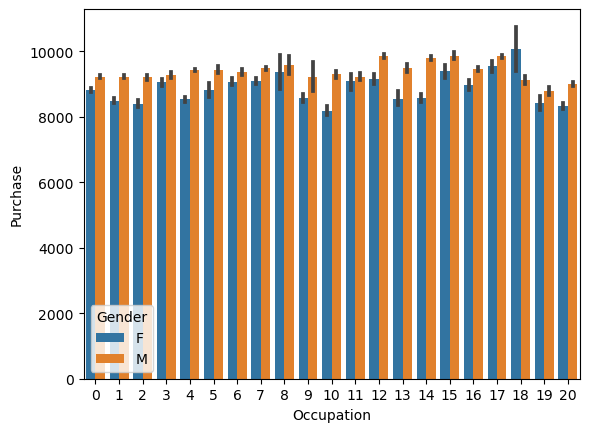

In [44]:
#visualization of purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

### Q. Which product have maximum and minimum purchase from Product_Category_1?

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

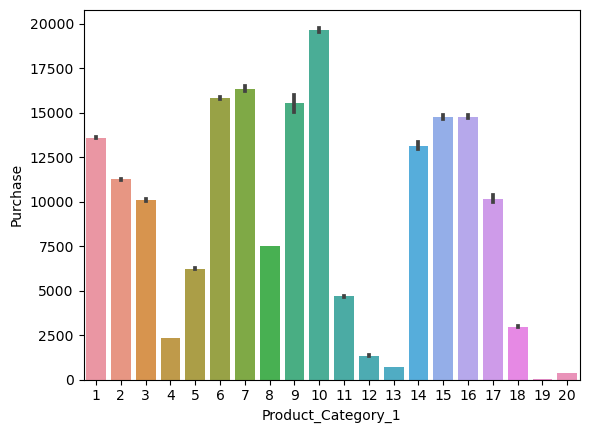

In [45]:
sns.barplot(x='Product_Category_1',y='Purchase',data=df)

##### category 10 has maximum and category 19 has minimum purchase from the Product_Category_1

### Q. Which is the most common category product among Product_Category_2 ?

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

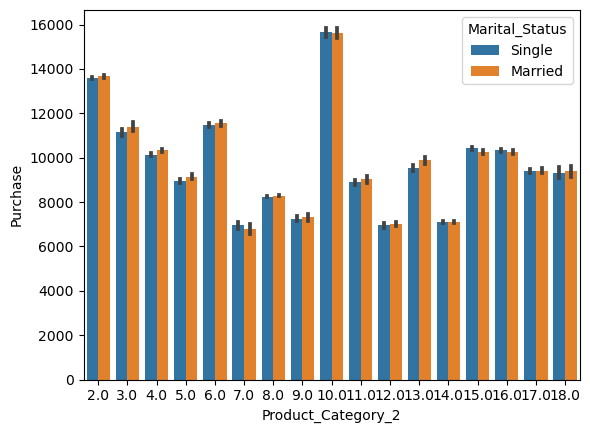

In [46]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Marital_Status',data=df)

##### category 10 is the most common in Product_Category_2

### Q. Which category has least purchase among Product_Category_3 w.r.t gender?

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

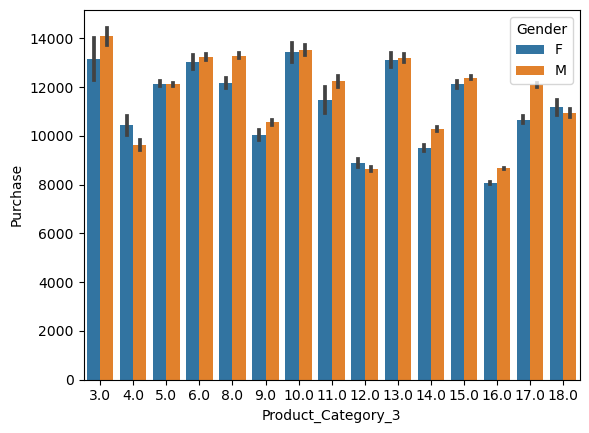

In [47]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

##### Category 16.0 has least purchase by both males and females 

### Q.   Show the correlation matrix of the data analysis of black friday sale ?

###### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have a high correlation, we can neglect one variable from those two.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9080\3483400858.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

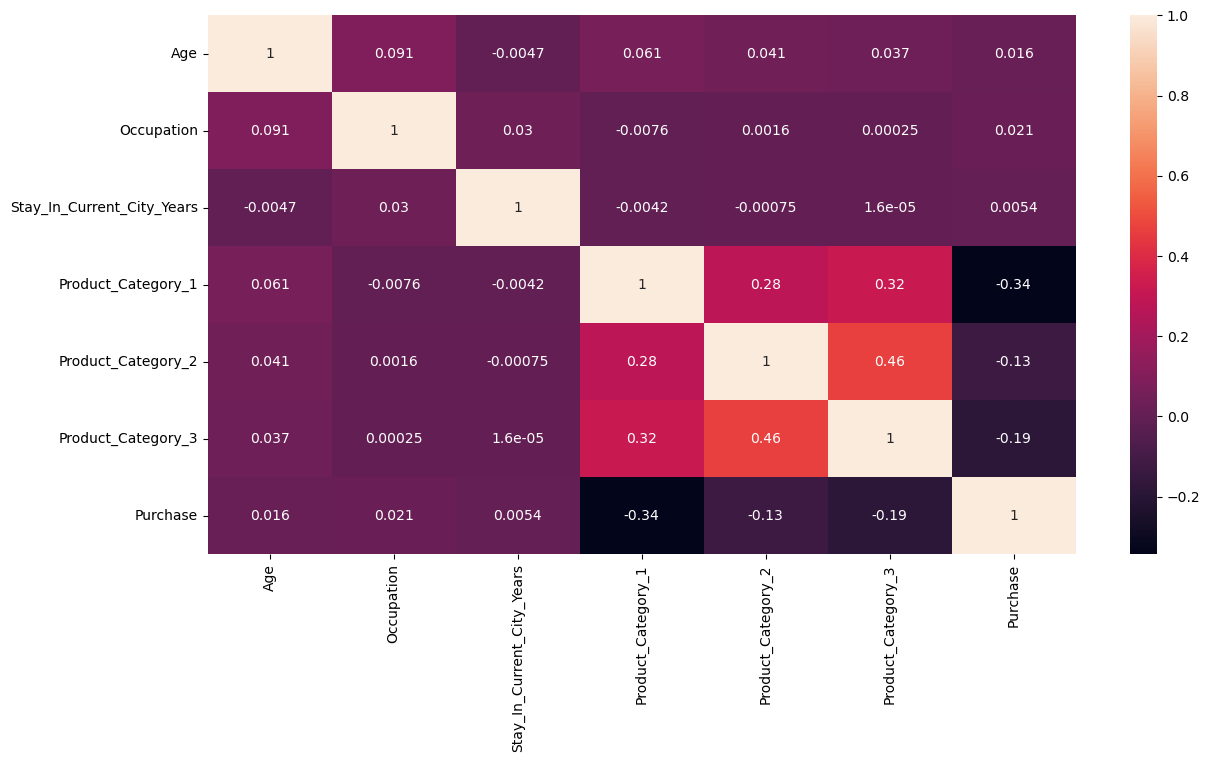

In [48]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True,fmt='.2g')

In [49]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,1,10,2,Single,3,8.0,16.0,8370
1,P00248942,F,1,10,2,Single,1,6.0,14.0,15200
2,P00087842,F,1,10,2,Single,12,8.0,16.0,1422
3,P00085442,F,1,10,2,Single,12,14.0,16.0,1057
4,P00285442,M,7,16,4,Single,8,8.0,16.0,7969


# CONCLUSION

From the above analysis we can conclude that the majority of buyers on Black Friday Sale are males.The most commonly bought products from Product_Category_1 are Category 1, 5 and 8 and from Product_Category_3 is Category 16.Whereas, the least bought product from Product_Category_2 is Category 7. Occupation 0,4 and 7 shop more whereas occupation 8 are a minimalist shopper. The majority of buyers are single between the age group of 26 to 35 years and have stayed in the current city for 1 year.